# Virtual Internships - Quantinum
Task 1

Data preparation and customer analytics

[Quantium’s retail analytics]

https://www.theforage.com/virtual-internships/prototype/NkaC7knWtjSbi6aYv/Data-Analytics?ref=TKyvTmFFdm4XJnuEc

Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

Importing the required libraries.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing the Transaction and Customer data

In [6]:
transactions_data = pd.read_excel("QVI_transaction_data.xlsx")
customer_data = pd.read_csv("QVI_purchase_behaviour.csv")

In [7]:
transactions_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
transactions_data.shape

(264836, 8)

In [9]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


 We can see that the date column is in an integer format. Let's change this to a date format.

In [10]:
transactions_data["DATE"]= pd.to_datetime(transactions_data["DATE"], unit='D', origin='1899-12-30')

In [11]:
transactions_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# Explantory Data Analysis

In [12]:
transactions_data["PROD_NAME"].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

There are 114 types of products (at times, same/similar products may be worded differntly). Let's figure it out!



In [13]:
transactions_data["PROD_NAME"].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

First removing digits from the Product field. Then removing the special charactes like &

In [14]:
transactions_data["PRODUCTS"]=transactions_data["PROD_NAME"].str.replace(r'([#,@,&,/])', '').str.replace(r'([0-9])','')

 Let's look at the most common words by counting the number of times a word appears and sorting them by this frequency in order of highest to lowest frequency


In [15]:
transactions_data['PRODUCTS'].str.split(expand=True).stack().value_counts()

g           246628
Chips        49770
Kettle       41288
Smiths       28860
Salt         27976
             ...  
Sunbites      1432
Pc            1431
NCC           1419
Garden        1419
Fries         1418
Length: 196, dtype: int64

In [16]:
chips = transactions_data[transactions_data["PRODUCTS"].str.contains('Chip', regex=False)]

In [17]:
chips.shape

(74570, 9)

There are salsa products in the dataset but we are only interested in the chips category, so let's remove these.

In [18]:
non_salsa = transactions_data[~transactions_data["PROD_NAME"].str.contains('Salsa')]


In [19]:
non_salsa.shape

(246742, 9)

In [20]:
non_salsa.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PRODUCTS          0
dtype: int64

In [21]:
non_salsa.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCTS
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g


In [22]:
non_salsa.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


 There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. Let's investigate further the case where 200 packets of chips are bought in one transaction.


<AxesSubplot:xlabel='PROD_QTY'>

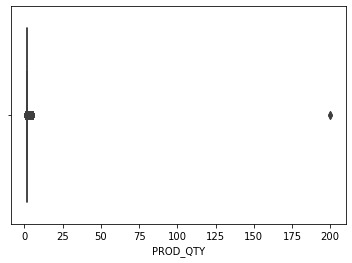

In [23]:
sns.boxplot(x='PROD_QTY',data= non_salsa)

In [24]:
non_salsa[non_salsa["PROD_QTY"]==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCTS
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme g
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme g


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer.

In [25]:
non_salsa[non_salsa["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCTS
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme g
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme g


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. 
We'll remove this loyalty card number from further analysis.


In [26]:
final = non_salsa[non_salsa["LYLTY_CARD_NBR"] != 226000]

In [27]:
final.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [28]:
final.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCTS
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g


In [29]:
final['dt'] = final.loc[:, 'DATE']

In [30]:
group_date = final.groupby('DATE').count()

In [31]:
group_date

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCTS,dt
DATE,,,,,,,,,
2018-07-01,663,663,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660,660,660
...,...,...,...,...,...,...,...,...,...
2019-06-26,657,657,657,657,657,657,657,657,657
2019-06-27,669,669,669,669,669,669,669,669,669
2019-06-28,673,673,673,673,673,673,673,673,673


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

In [32]:
rng = pd.date_range('2018-07-01', periods=365, freq='D')
date_sequence = pd.DataFrame({ 'DATE_CREATED': rng, 'Val': 0 }) 
date_sequence.set_index(pd.to_datetime(date_sequence['DATE_CREATED']), inplace=True)
date_sequence

,DATE_CREATED,Val
DATE_CREATED,,
2018-07-01,2018-07-01,0
2018-07-02,2018-07-02,0
2018-07-03,2018-07-03,0
2018-07-04,2018-07-04,0
2018-07-05,2018-07-05,0
...,...,...
2019-06-26,2019-06-26,0
2019-06-27,2019-06-27,0
2019-06-28,2019-06-28,0


In [33]:
join_bydate=pd.merge(date_sequence,group_date, how='outer', left_index=True, right_index=True)


In [34]:
join_bydate

,DATE_CREATED,Val,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCTS,dt
2018-07-01,2018-07-01,0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0
2018-07-02,2018-07-02,0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0
2018-07-03,2018-07-03,0,674.0,674.0,674.0,674.0,674.0,674.0,674.0,674.0,674.0
2018-07-04,2018-07-04,0,669.0,669.0,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2018-07-05,2018-07-05,0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-06-26,2019-06-26,0,657.0,657.0,657.0,657.0,657.0,657.0,657.0,657.0,657.0
2019-06-27,2019-06-27,0,669.0,669.0,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2019-06-28,2019-06-28,0,673.0,673.0,673.0,673.0,673.0,673.0,673.0,673.0,673.0
2019-06-29,2019-06-29,0,703.0,703.0,703.0,703.0,703.0,703.0,703.0,703.0,703.0


In [35]:
join_bydate.isnull().value_counts().any()

True

In [36]:
join_bydate[join_bydate.isnull().any(axis=1)]

,DATE_CREATED,Val,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCTS,dt
2018-12-25,2018-12-25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


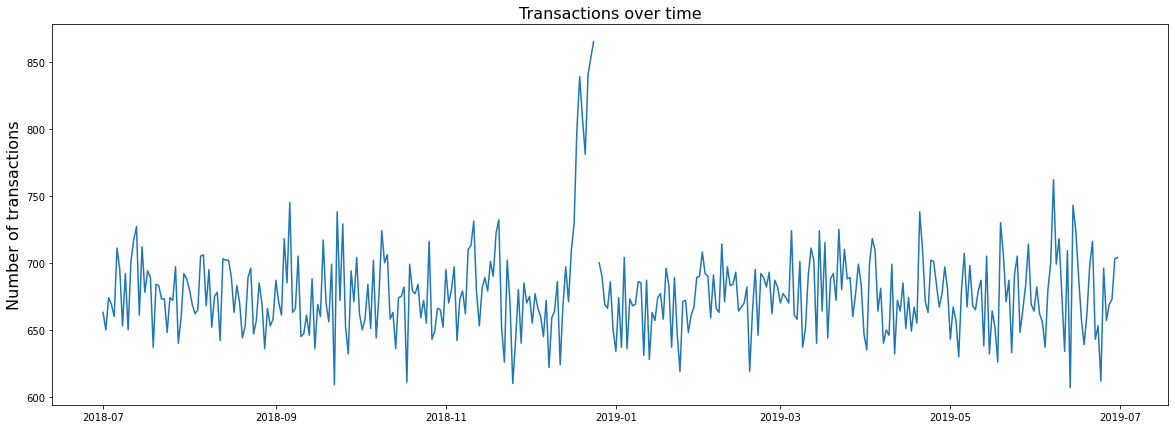

In [37]:
plt.figure(figsize=(20,7))
plt.title('Transactions over time', fontsize=16)
plt.ylabel('Number of transactions', fontsize=16)
# plt.suptitle('This is a somewhat long figure title', fontsize=16)
plt.plot(join_bydate["DATE_CREATED"],join_bydate['dt'])

We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.

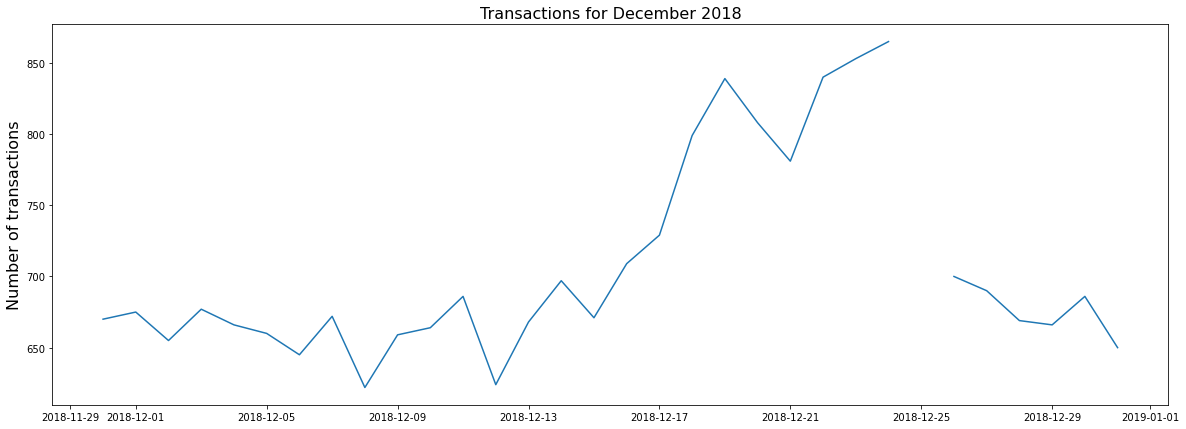

In [38]:
plt.figure(figsize=(20,7))
plt.title('Transactions for December 2018', fontsize=16)
plt.ylabel('Number of transactions', fontsize=16)
plt.plot(join_bydate['DATE_CREATED']['20181130':'20181231'],join_bydate['dt']['20181130':'20181231'])

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

In [39]:
final.drop('dt',axis=1,inplace=True)

In [40]:
final["PROD_SIZE"]= final['PROD_NAME'].str.extract('(\d+)')

In [41]:
final['PROD_SIZE'].value_counts()

175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PROD_SIZE, dtype: int64

In [42]:
size_unique=final["PROD_SIZE"].unique()
np.sort(size_unique)

array(['110', '125', '134', '135', '150', '160', '165', '170', '175',
       '180', '190', '200', '210', '220', '250', '270', '330', '380',
       '70', '90'], dtype=object)

The largest size is 380g and the smallest size is 70g - seems sensible!

<AxesSubplot:>

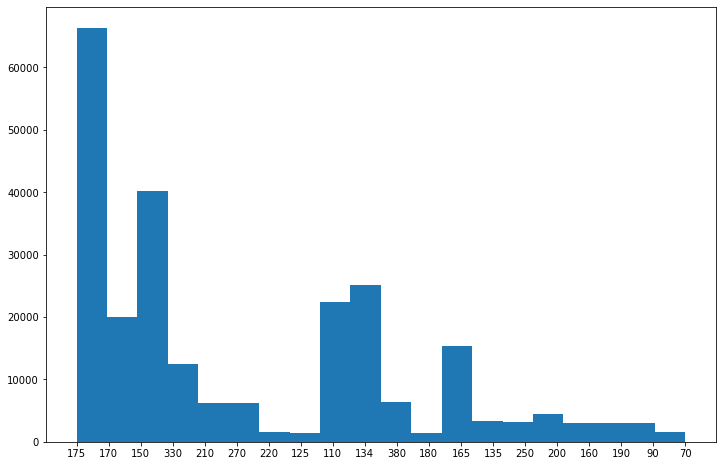

In [43]:
final['PROD_SIZE'].hist(bins=20,grid=False, figsize=(12,8))


### Observation
Packages with 175g weight are bought more frequently, followed by 150g, 134g, 110g, 165g and so on

Let us now investigate the `brand`, extracted as a first word from the `PROD_NAME` column.

In [111]:
final['BRAND_NAME']=final["PROD_NAME"].str.split(' ').str[0]
final.head()
#Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips. 
#Let's combine these together.

final["BRAND_NAME"]=final["BRAND_NAME"].replace('Red','RRD')
final["BRAND_NAME"]=final["BRAND_NAME"].replace('SNBTS','SUNBITES')
final["BRAND_NAME"]=final["BRAND_NAME"].replace('infzns','Infuzions')
final["BRAND_NAME"]=final["BRAND_NAME"].replace('WW','woolworths')
final["BRAND_NAME"]=final["BRAND_NAME"].replace('Smith','Smiths')
final["BRAND_NAME"]=final["BRAND_NAME"].replace('NCC','Natural')
final["BRAND_NAME"]=final["BRAND_NAME"].replace('Dorito','Doritos')
final["BRAND_NAME"]=final["BRAND_NAME"].replace('Grain','GrnWves')

In [45]:
final['BRAND_NAME'].value_counts()

Kettle        41288
Smiths        30353
Doritos       25224
Pringles      25102
RRD           16321
Thins         14075
Infuzions     11057
woolworths    10320
Cobs           9693
Tostitos       9471
Twisties       9454
GrnWves        7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Infzns         3144
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
Sunbites       1432
French         1418
Name: BRAND_NAME, dtype: int64

### Observation

Brands with higest transactions are Kettle, Smiths, Doritos, Pringles

Now, let us evaluate consumer data for data cleaning exercise

In [46]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [47]:
customer_data.shape

(72637, 3)

In [48]:
customer_data['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

### Observation

Most of the customers are retirees, followed by older singles/couples. Size of the new families is the least.

In [49]:
customer_data["PREMIUM_CUSTOMER"].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

### Observation

As expected, premium customers are less in number. However, it is not a simple pyramid structure, as the size of Mainstream customers (middle income class) is bigger than budget category.

In [50]:
customer_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [51]:
customer_data.duplicated().sum()

0

In [52]:
merged = pd.merge(final, customer_data, on=["LYLTY_CARD_NBR"])
merged.shape

(246740, 13)

In [53]:
merged.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCTS,PROD_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,WW Original Stacked Chips g,160,woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,CCs Original g,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [54]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PRODUCTS          246740 non-null  object        
 9   PROD_SIZE         246740 non-null  object        
 10  BRAND_NAME        246740 non-null  object        
 11  LIFESTAGE         246740 non-null  object        
 12  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memor

In [55]:
merged.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PRODUCTS            0
PROD_SIZE           0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [56]:
merged.to_csv(r'QVI_data.csv', index = False)

After data cleaning process, Let's now do the Analysis of Customer Behaviour.

To find answers to questions like:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

In [57]:
merged.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()

STORE_NBR  LYLTY_CARD_NBR  \
PREMIUM_CUSTOMER LIFESTAGE                                           
Budget           MIDAGE SINGLES/COUPLES     641330       644440514   
                 NEW FAMILIES               380365       380867986   
                 OLDER FAMILIES            2881588      2891942530   
                 OLDER SINGLES/COUPLES     2318353      2332495098   
                 RETIREES                  1917631      1927702126   
                 YOUNG FAMILIES            2410844      2415761554   
                 YOUNG SINGLES/COUPLES     1154509      1158321877   
Mainstream       MIDAGE SINGLES/COUPLES    1496281      1500774290   
                 NEW FAMILIES               287481       288014877   
                 OLDER FAMILIES            1780625      1782766792   
                 OLDER SINGLES/COUPLES     2265662      2279764274   
                 RETIREES                  2745301      2753153856   
                 YOUNG FAMILIES            1634618      1641169212   
                 YOUNG SINGLES/COUPLES     2624060      2637061979   
Premium          MIDAGE SINGLES/COUPLES    1033933      1039707670   
                 NEW FAMILIES               201835       202109224   
                 OLDER FAMILIES            1403359      1404881088   
                 OLDER SINGLES/COUPLES     2222527      2228223157   
                 RETIREES                  1655552      1660094379   
                 YOUNG FAMILIES            1457226      1461126913   
                 YOUNG SINGLES/COUPLES      809246       810354894   

                                             TXN_ID  PROD_NBR  PROD_QTY  \
PREMIUM_CUSTOMER LIFESTAGE                                                
Budget           MIDAGE SINGLES/COUPLES   642288813    268427      8883   
                 NEW FAMILIES             380789234    160008      5241   
                 OLDER FAMILIES          2881775837   1209817     41853   
                 OLDER SINGLES/COUPLES   2320298702    967613     32883   
                 RETIREES                1918399243    795190     26932   
                 YOUNG FAMILIES          2412063244   1010965     34482   
                 YOUNG SINGLES/COUPLES   1154747066    487920     15500   
Mainstream       MIDAGE SINGLES/COUPLES  1500385149    615380     21213   
                 NEW FAMILIES             287803734    121152      4060   
                 OLDER FAMILIES          1780679553    748698     25804   
                 OLDER SINGLES/COUPLES   2266525908    966120     32607   
                 RETIREES                2746520511   1121770     37677   
                 YOUNG FAMILIES          1635696850    686662     23194   
                 YOUNG SINGLES/COUPLES   2625680359   1079249     36225   
Premium          MIDAGE SINGLES/COUPLES  1034352880    428798     14400   
                 NEW FAMILIES             201992124     85084      2769   
                 OLDER FAMILIES          1403077688    590961     20239   
                 OLDER SINGLES/COUPLES   2223619531    926743     31695   
                 RETIREES                1657119016    690206     23266   
                 YOUNG FAMILIES          1458192325    609895     20901   
                 YOUNG SINGLES/COUPLES    810057414    333687     10575   

                                         TOT_SALES  
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           MIDAGE SINGLES/COUPLES   33345.70  
                 NEW FAMILIES             20607.45  
                 OLDER FAMILIES          156863.75  
                 OLDER SINGLES/COUPLES   127833.60  
                 RETIREES                105916.30  
                 YOUNG FAMILIES          129717.95  
                 YOUNG SINGLES/COUPLES    57122.10  
Mainstream       MIDAGE SINGLES/COUPLES   84734.25  
                 NEW FAMILIES             15979.70  
                 OLDER FAMILIES           96413.55  
                 OLDER SINGLES/COUPLES   124648.50  
               

In [58]:
PREMIUM_CUSTOMER = merged.groupby('PREMIUM_CUSTOMER').agg({'TOT_SALES': ['mean', 'min', 'max','sum','count']})
PREMIUM_CUSTOMER

TOT_SALES                             
                      mean  min   max        sum  count
PREMIUM_CUSTOMER                                       
Budget            7.277458  1.7  29.5  631406.85  86762
Mainstream        7.374193  1.7  29.5  700865.40  95043
Premium           7.282751  1.7  29.5  472905.45  64935

### Insight - 1
Preimum customers are not buying more chips, Mainstream customers are spending more on Chips.

In [59]:
LIFESTAGE = merged.groupby('LIFESTAGE').agg({'TOT_SALES': ['mean', 'min', 'max','sum','count']})
LIFESTAGE

TOT_SALES                             
                            mean  min   max        sum  count
LIFESTAGE                                                    
MIDAGE SINGLES/COUPLES  7.373442  1.7  29.5  172523.80  23398
NEW FAMILIES            7.287664  1.7  27.0   47347.95   6497
OLDER FAMILIES          7.274899  1.7  29.5  328519.90  45158
OLDER SINGLES/COUPLES   7.402982  1.7  29.5  376019.65  50793
RETIREES                7.373994  1.7  29.5  342381.90  46431
YOUNG FAMILIES          7.275841  1.7  29.5  294627.90  40494
YOUNG SINGLES/COUPLES   7.175854  1.7  27.0  243756.60  33969

<AxesSubplot:xlabel='PREMIUM_CUSTOMER'>

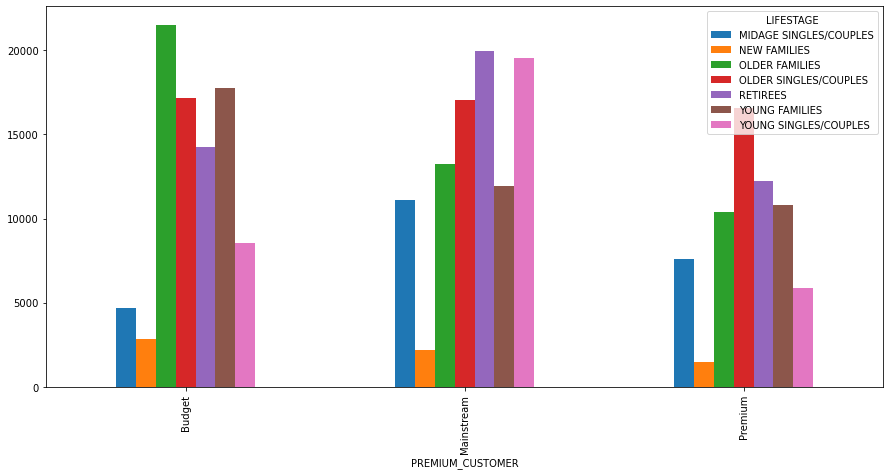

In [60]:
merged.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).size().unstack().plot(kind='bar', figsize=(15,7), stacked=False)

<AxesSubplot:xlabel='LIFESTAGE'>

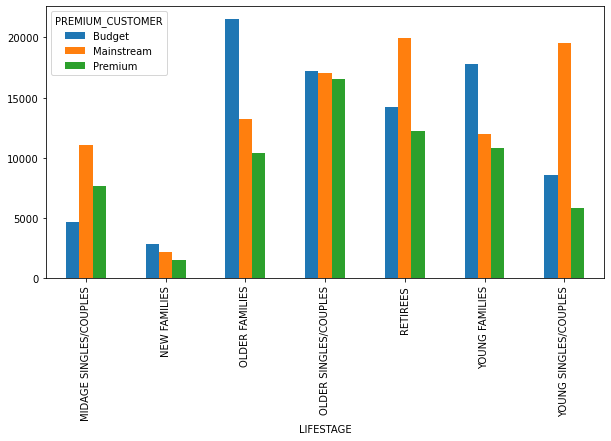

In [61]:
merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().unstack().plot(kind='bar', figsize=(10,5), stacked=False)

<AxesSubplot:xlabel='LIFESTAGE'>

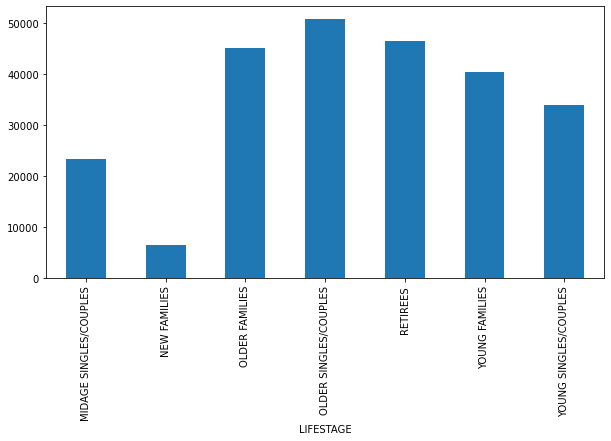

In [62]:
merged.groupby(['LIFESTAGE']).size().plot(kind='bar', figsize=(10,5), stacked=False)

<AxesSubplot:xlabel='PREMIUM_CUSTOMER'>

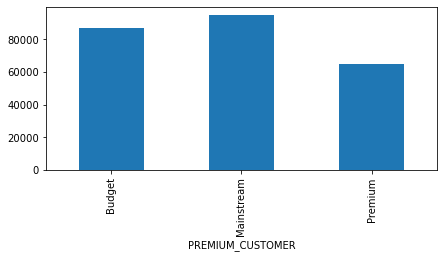

In [63]:
merged.groupby(['PREMIUM_CUSTOMER']).size().plot(kind='bar', figsize=(7,3), stacked=False)


### Insight -2
Older singles/couples spend more on chips, new families spend the least amount on chips. Low number of new families, may be the reason.

In [81]:
grouped_multiple = merged.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).agg({'TOT_SALES': ['mean', 'min', 'max','sum', 'count']})
grouped_multiple.columns = ['Sales_mean', 'Sales_min', 'Sales_max', 'Sales_tot', 'Sales_num']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple

,PREMIUM_CUSTOMER,LIFESTAGE,Sales_mean,Sales_min,Sales_max,Sales_tot,Sales_num
0,Budget,MIDAGE SINGLES/COUPLES,7.108442,1.7,28.5,33345.70,4691
1,Budget,NEW FAMILIES,7.297256,1.7,27.0,20607.45,2824
2,Budget,OLDER FAMILIES,7.291241,1.7,28.5,156863.75,21514
3,Budget,OLDER SINGLES/COUPLES,7.444305,1.7,28.5,127833.60,17172
4,Budget,RETIREES,7.445786,1.7,28.5,105916.30,14225
5,Budget,YOUNG FAMILIES,7.302705,1.7,29.5,129717.95,17763
6,Budget,YOUNG SINGLES/COUPLES,6.663023,1.7,27.0,57122.10,8573
7,Mainstream,MIDAGE SINGLES/COUPLES,7.637156,1.7,29.5,84734.25,11095
8,Mainstream,NEW FAMILIES,7.313364,1.7,23.0,15979.70,2185
9,Mainstream,OLDER FAMILIES,7.281440,1.7,29.5,96413.55,13241


In [82]:
grouped_multiple.sort_values('Sales_tot', ascending=False)

,PREMIUM_CUSTOMER,LIFESTAGE,Sales_mean,Sales_min,Sales_max,Sales_tot,Sales_num
2,Budget,OLDER FAMILIES,7.291241,1.7,28.5,156863.75,21514
13,Mainstream,YOUNG SINGLES/COUPLES,7.551279,1.7,27.0,147582.20,19544
11,Mainstream,RETIREES,7.269352,1.7,29.5,145168.95,19970
5,Budget,YOUNG FAMILIES,7.302705,1.7,29.5,129717.95,17763
3,Budget,OLDER SINGLES/COUPLES,7.444305,1.7,28.5,127833.60,17172
10,Mainstream,OLDER SINGLES/COUPLES,7.306049,1.7,28.5,124648.50,17061
17,Premium,OLDER SINGLES/COUPLES,7.459997,1.7,29.5,123537.55,16560
4,Budget,RETIREES,7.445786,1.7,28.5,105916.30,14225
9,Mainstream,OLDER FAMILIES,7.281440,1.7,29.5,96413.55,13241
18,Premium,RETIREES,7.461315,1.7,29.5,91296.65,12236


### Insight - 3
- Budget category, older families are the largest cosumer of chips
- Followed by Mainstream, YOUNG SINGLES/COUPLES and Mainstream, RETIREES
- New families in all three categories Budget, Mainstream and Premium spend the least on chips

In [83]:
grouped_multiple.sort_values('Sales_mean', ascending=False)

,PREMIUM_CUSTOMER,LIFESTAGE,Sales_mean,Sales_min,Sales_max,Sales_tot,Sales_num
7,Mainstream,MIDAGE SINGLES/COUPLES,7.637156,1.7,29.5,84734.25,11095
13,Mainstream,YOUNG SINGLES/COUPLES,7.551279,1.7,27.0,147582.20,19544
18,Premium,RETIREES,7.461315,1.7,29.5,91296.65,12236
17,Premium,OLDER SINGLES/COUPLES,7.459997,1.7,29.5,123537.55,16560
4,Budget,RETIREES,7.445786,1.7,28.5,105916.30,14225
3,Budget,OLDER SINGLES/COUPLES,7.444305,1.7,28.5,127833.60,17172
8,Mainstream,NEW FAMILIES,7.313364,1.7,23.0,15979.70,2185
10,Mainstream,OLDER SINGLES/COUPLES,7.306049,1.7,28.5,124648.50,17061
5,Budget,YOUNG FAMILIES,7.302705,1.7,29.5,129717.95,17763
1,Budget,NEW FAMILIES,7.297256,1.7,27.0,20607.45,2824


### Insight - 4

- Mainstream, MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES and Premium, RETIREE buy chips less frequently but in higher ticket size.
- Per transaction spend on chips is lowest for Budget, MIDAGE SINGLES/COUPLES and Premium, YOUNG SINGLES/COUPLES

In [84]:
# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER Over to you! 
# Calculate and plot the average number of units per customer by those two dimensions.

merged['PROD_QTY'].value_counts() # Most of the transactions have 1 or 2 units of PORD_QTY 

2    220070
1     25476
5       415
3       408
4       371
Name: PROD_QTY, dtype: int64

In [122]:
# Lets look at the PROD_QTY * SIZE = VOLUME
merged['VOL'] = merged['PROD_QTY'] * merged['PROD_SIZE'] 
merged['VOL'].describe()

count     246740
unique       100
top       175175
freq       59103
Name: VOL, dtype: object

#### Note

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts. 

- As the difference in average price per unit isn't large, we can check if this difference is statistically different.
- Perform an independent t-test between (mainstream vs premium) and (budget midage and young singles and couples).

In [105]:
from scipy.stats import ttest_ind

In [106]:
Premium = merged[merged['PREMIUM_CUSTOMER']=='Premium']
Mainstream = merged[merged['PREMIUM_CUSTOMER']=='Mainstream']

ttest_ind(Premium['AVG_PRICE'], Mainstream['AVG_PRICE'])

Ttest_indResult(statistic=-11.096115580393358, pvalue=1.3420572458727282e-28)

### T-test results:

T-test results are significant, meaning the average price paid by the premium members are significantly different than the average prices paid by the mainstream customers.

In [109]:
Midage= merged[(merged['PREMIUM_CUSTOMER']=='Budget') & (merged['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')]
Young = merged[(merged['PREMIUM_CUSTOMER']=='Budget') & (merged['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]

ttest_ind(Midage['AVG_PRICE'], Young['AVG_PRICE'])

Ttest_indResult(statistic=4.3323761417023485, pvalue=1.4859368284556205e-05)

### T-test results:

Results of the t-test indicate that the difference in unit price is significant.

i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than
that of budget or premium, young and midage singles and couples.
